In [219]:
import pickle
import numpy as np
import scipy as sp
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from template_data import sparce_template, dense_template

In [220]:
x, y = dense_template()

In [221]:
x, y = shuffle(x.T, y)
x_100, y_100 = x[1000:1100], y[1000:1100]
x_1000, y_1000 = x[:1000], y[:1000]

In [222]:
print(x.shape, y.shape, x_1000.shape, y_1000.shape)

(14600, 2) (14600,) (1000, 2) (1000,)


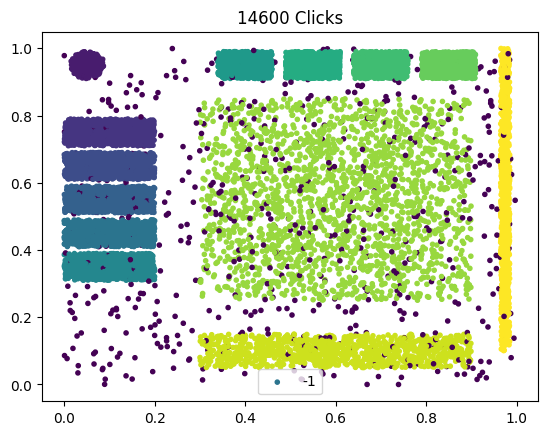

(14600, 2) (14600,)


In [223]:
plt.scatter(x.T[0], x.T[1], c=y, marker='.')
plt.title("14600 Clicks")
plt.legend(np.unique(y))
plt.show()
print(x.shape, y.shape)

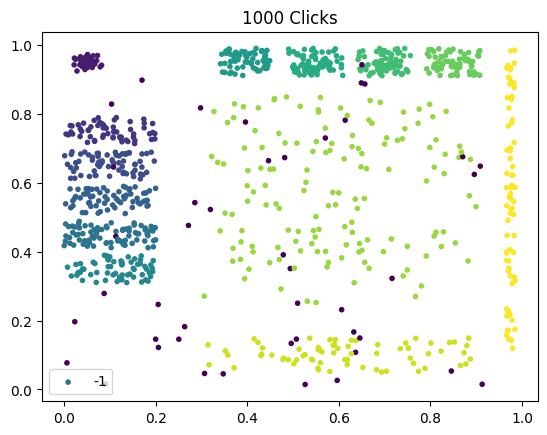

In [224]:
plt.scatter(x_1000.T[0], x_1000.T[1], c=y_1000, marker='.')
plt.title("1000 Clicks")
plt.legend(np.unique(y_1000))
plt.show()

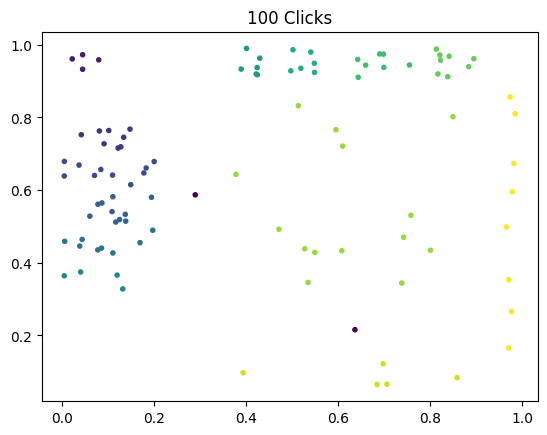

In [225]:
plt.scatter(x_100.T[0], x_100.T[1], c=y_100, marker='.')
plt.title("100 Clicks")
# plt.legend(np.unique(y_1000))
plt.show()

In [226]:
clustering = DBSCAN(eps=0.019, min_samples=5, n_jobs=5).fit(x)
y_pred = clustering.labels_
print(len(y_pred))
print(len(np.unique(np.array(y_pred))))

14600
19


In [227]:
print(x[5], y_pred[5])

[0.04854031 0.94622184] 3


In [228]:
clustering.get_params()

{'algorithm': 'auto',
 'eps': 0.019,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': 5,
 'p': None}

In [229]:
filename = "../trained_models/cluster_model.pkl"

In [230]:
# pickle.dump(clustering, open(filename, 'wb'))

In [231]:
# clustering = pickle.load(open(filename, 'rb'))

In [232]:
len(clustering.labels_)

14600

In [233]:
test_data = np.array([[0.6,0.6]])
def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.euclidean):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

y_1 = dbscan_predict(clustering, test_data)
print(y_1)

[4]


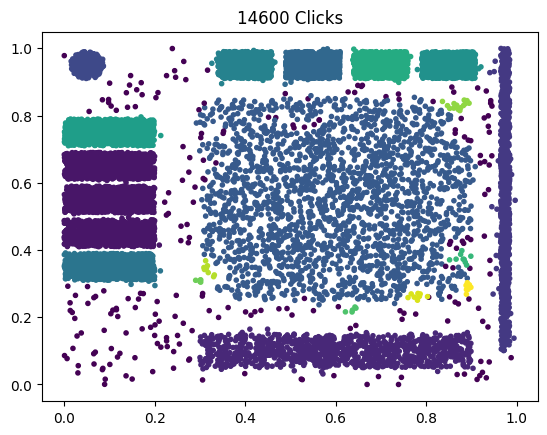

(14600, 2) (14600,)


In [234]:
plt.scatter(x.T[0], x.T[1], c=y_pred, marker='.')
plt.title("14600 Clicks")
plt.show()
print(x.shape, y.shape)

In [235]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

In [236]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

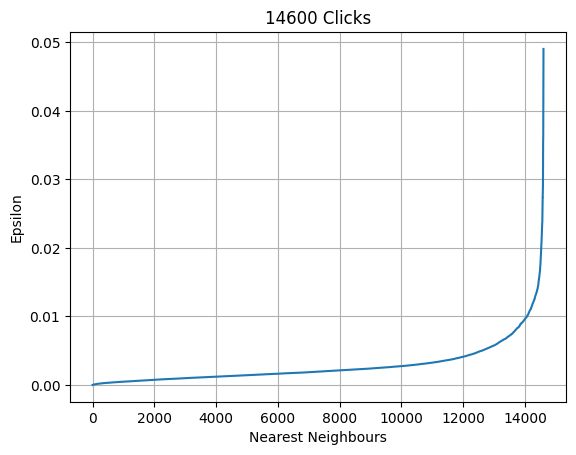

In [237]:
plt.plot(distances)
plt.title('14600 Clicks')
plt.xlabel('Nearest Neighbours')
plt.ylabel('Epsilon')
plt.grid()
plt.show()

In [238]:
# Testing on smaller dataset
clustering = DBSCAN(eps=0.028, min_samples=5).fit(x_1000)
y_pred = clustering.labels_
print(len(np.unique(np.array(y_pred))))

19


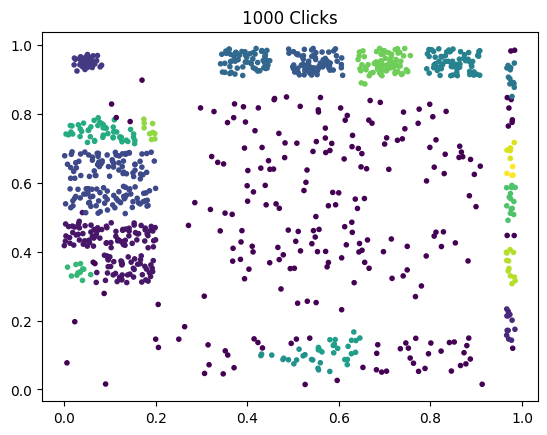

In [239]:
plt.scatter(x_1000.T[0], x_1000.T[1], c=y_pred, marker='.')
plt.title("1000 Clicks")
plt.show()

In [240]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x_1000)
distances, indices = nbrs.kneighbors(x_1000)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

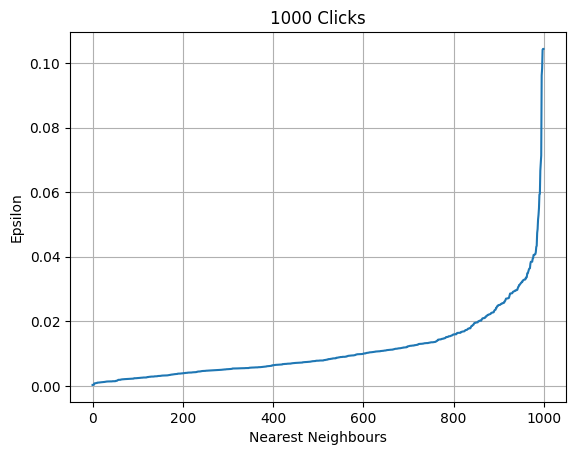

In [241]:
plt.plot(distances)
plt.title("1000 Clicks")
plt.xlabel('Nearest Neighbours')
plt.ylabel('Epsilon')
plt.grid()
plt.show()

In [242]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x_100)
distances, indices = nbrs.kneighbors(x_100)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

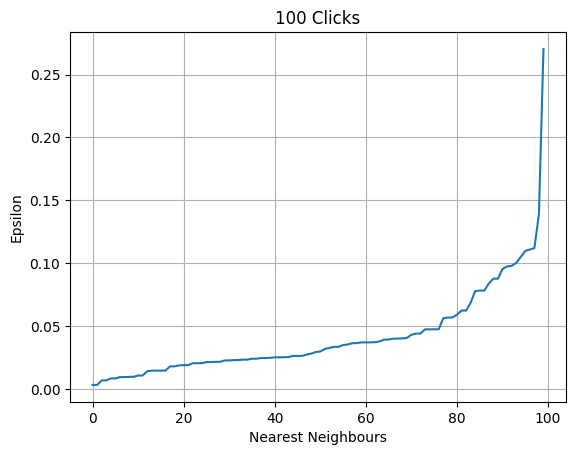

In [243]:
plt.plot(distances)
plt.title("100 Clicks")
plt.xlabel('Nearest Neighbours')
plt.ylabel('Epsilon')
plt.grid()
plt.show()

In [252]:
# Testing on smaller dataset
clustering = DBSCAN(eps=0.04, min_samples=3).fit(x_100)
y_pred = clustering.labels_
print(len(np.unique(np.array(y_pred))))

12


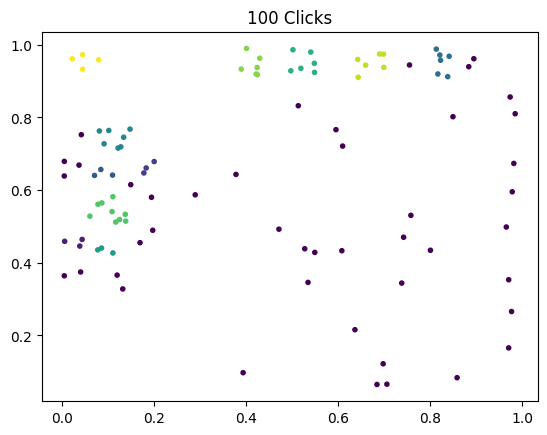

In [253]:
plt.scatter(x_100.T[0], x_100.T[1], c=y_pred, marker='.')
plt.title('100 Clicks')
plt.show()

In [166]:
clustering = OPTICS(min_samples=10, max_eps=0.015).fit(x)
y_pred = clustering.labels_
print(len(np.unique(np.array(y_pred))))

253


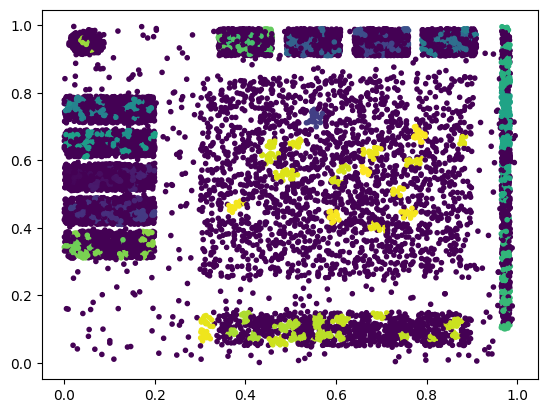

In [167]:
plt.scatter(x.T[0], x.T[1], c=y_pred, marker='.')
plt.show()

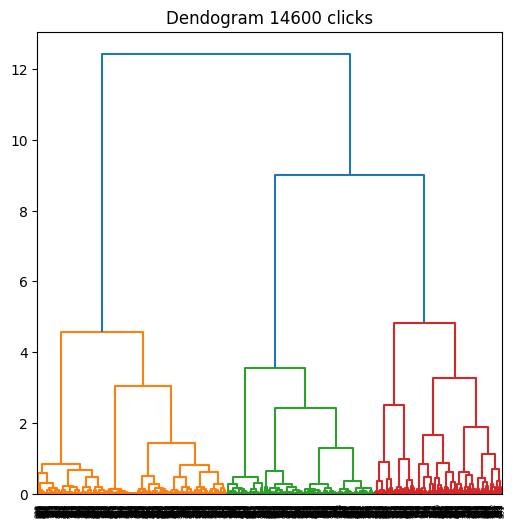

In [168]:
plt.figure(figsize =(6, 6))
plt.title('Dendogram 14600 clicks')
Dendrogram = shc.dendrogram((shc.linkage(x_1000, method ='ward')))

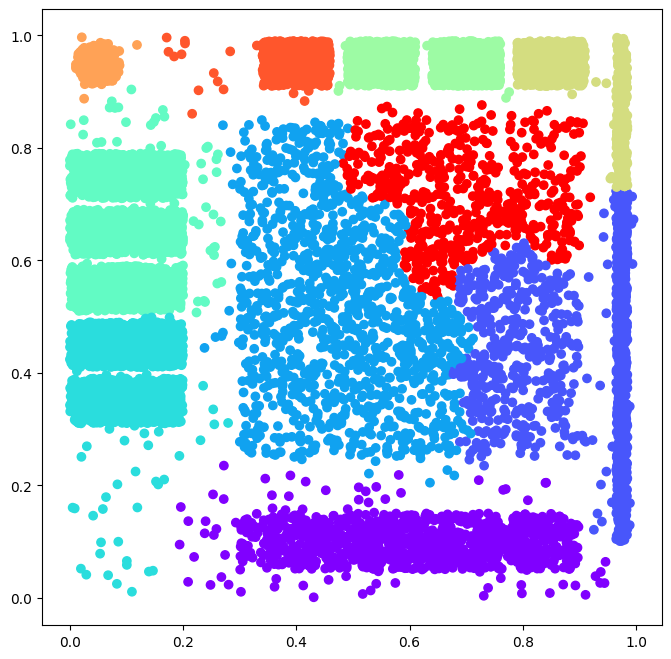

In [169]:
ac2 = AgglomerativeClustering(n_clusters = 10, linkage='ward')
y_pred = ac2.fit_predict(x)
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(x.T[0], x.T[1], c = y_pred, cmap ='rainbow')
plt.show()

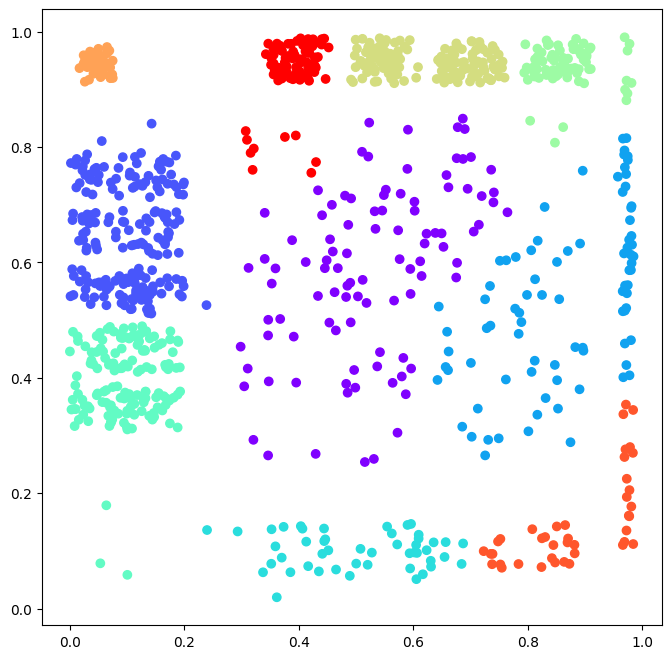

In [170]:
ac2 = AgglomerativeClustering(n_clusters = 10, linkage='ward')
y_pred = ac2.fit_predict(x_1000)
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(x_1000.T[0], x_1000.T[1], c = y_pred, cmap ='rainbow')
plt.show()